In [8]:
import numpy as np
import matplotlib.pyplot as pl6t
%matplotlib inline

In [ ]:
%matplotlib inline

[[ 34.34104113]
 [  3.15638334]
 [ -4.62552092]]


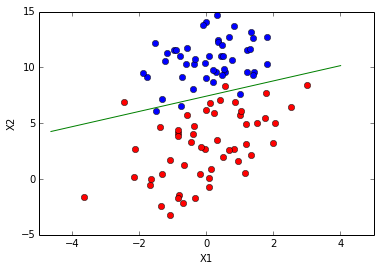

In [54]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def SGD(training_x, training_y, alpha, max_iter):
    m, n = training_x.shape
    theta = np.zeros((n, 1))
    for k in xrange(max_iter):
        for i in xrange(m):
            h = sigmoid(training_x[i, :].dot(theta))
            theta = theta + alpha * (training_y[0, i] - h[0, 0]) * training_x[i, :].transpose()
    return theta

def show(training_x, training_y, theta):
    m, n = training_x.shape
    for i in xrange(m):
        if training_y[0, i] == 1:
            plt.plot(training_x[i, 1], training_x[i, 2], 'ro')
        else:
            plt.plot(training_x[i, 1], training_x[i, 2], 'bo')
    
    # draw the classify line  
    min_x = min(training_x[:, 1])[0, 0] - 1.0
    max_x = max(training_x[:, 1])[0, 0] + 1.0
    theta = theta.getA()  # convert mat to array  
    y_min_x = float(-theta[0] - theta[1] * min_x) / theta[2]  
    y_max_x = float(-theta[0] - theta[1] * max_x) / theta[2]  
    plt.plot([min_x, max_x], [y_min_x, y_max_x], '-g')  
    plt.xlabel('X1'); plt.ylabel('X2')  
    plt.show()  


def test():
    training_x = []
    training_y = []
    with open('data_logistic.txt', 'r') as fp:
        for line in fp:
            line = line.strip().split()
            training_x.append([1.0, float(line[0]), float(line[1])])
            training_y.append(int(line[2]))
    training_x = np.matrix(training_x)
    training_y = np.matrix(training_y)
    alpha = 0.1
    max_iter = 1000 
    theta = SGD(training_x, training_y, alpha, max_iter)
    print theta
    show(training_x, training_y, theta)

    
test()
